# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [1]:
aTuple = (1, 2, 3)
aList = list(aTuple)

In [2]:
aList

[1, 2, 3]

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

In [4]:
# Loading data
boston = pd.DataFrame(data = load_boston().data, columns = load_boston().feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
boston['MEDV'] = load_boston().target

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Summary of data
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Checking if there is any null value
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
boston.shape

(506, 14)

In [10]:
# Separating Dependent and Independent Variables
X = boston.drop(columns = ['MEDV'], axis = 1).values
Y = boston['MEDV'].values
print(X)
print(Y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [11]:
# Plotting scatterplot of all columns with MEDV

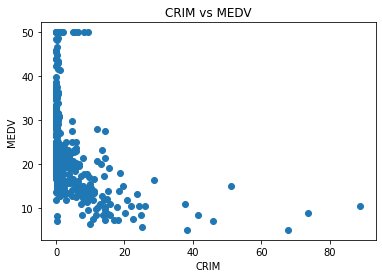

In [12]:
plt.scatter(boston['CRIM'],boston['MEDV'])
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.title('CRIM vs MEDV')
plt.show()

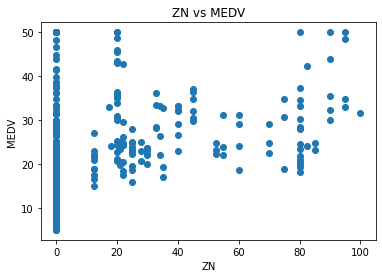

In [13]:
plt.scatter(boston['ZN'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('ZN')
plt.title('ZN vs MEDV')
plt.show()

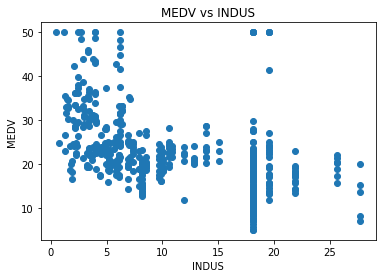

In [14]:
plt.scatter(boston['INDUS'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('INDUS')
plt.title('MEDV vs INDUS')
plt.show()

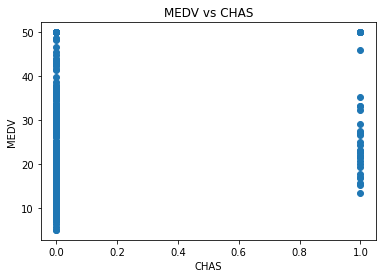

In [15]:
plt.scatter(boston['CHAS'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('CHAS')
plt.title('MEDV vs CHAS')
plt.show()

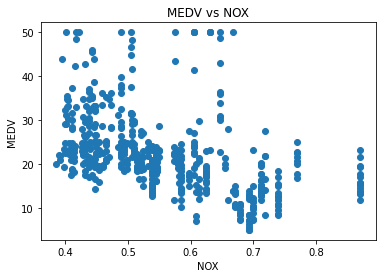

In [16]:
plt.scatter(boston['NOX'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('NOX')
plt.title('MEDV vs NOX')
plt.show()

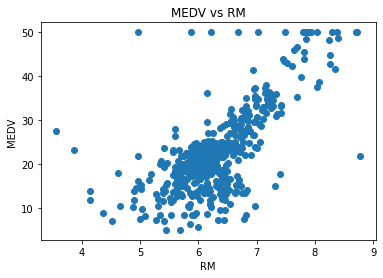

In [17]:
plt.scatter(boston['RM'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('RM')
plt.title('MEDV vs RM')
plt.show()

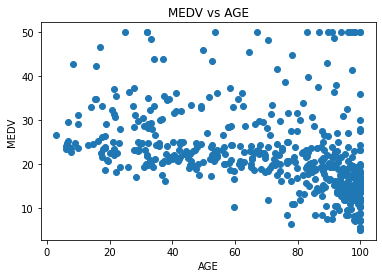

In [18]:
plt.scatter(boston['AGE'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('AGE')
plt.title('MEDV vs AGE')
plt.show()

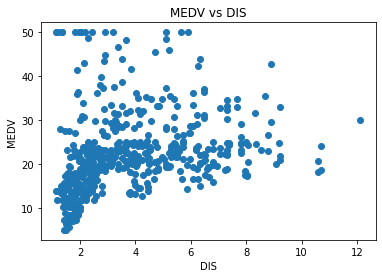

In [19]:
plt.scatter(boston['DIS'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('DIS')
plt.title('MEDV vs DIS')
plt.show()

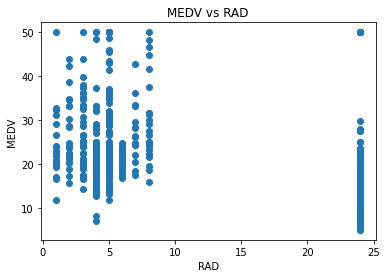

In [20]:
plt.scatter(boston['RAD'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('RAD')
plt.title('MEDV vs RAD')
plt.show()

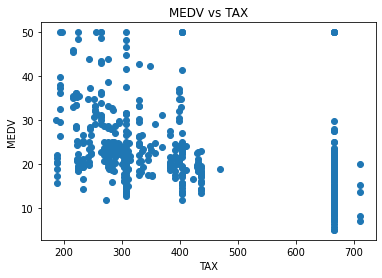

In [21]:
plt.scatter(boston['TAX'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('TAX')
plt.title('MEDV vs TAX')
plt.show()

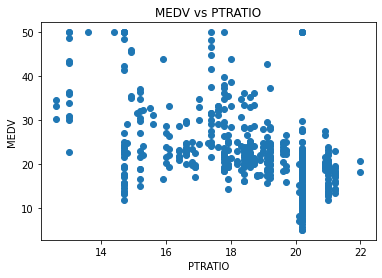

In [22]:
plt.scatter(boston['PTRATIO'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('PTRATIO')
plt.title('MEDV vs PTRATIO')
plt.show()

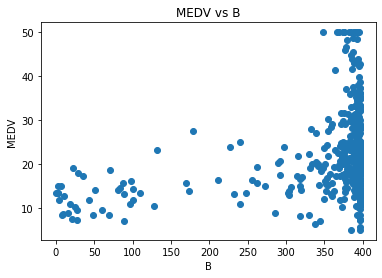

In [23]:
plt.scatter(boston['B'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('B')
plt.title('MEDV vs B')
plt.show()

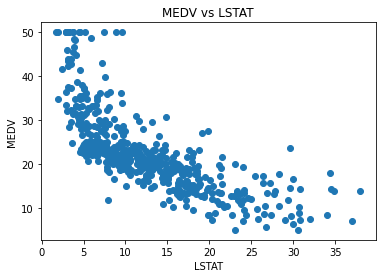

In [24]:
plt.scatter(boston['LSTAT'],boston['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('LSTAT')
plt.title('MEDV vs LSTAT')
plt.show()

In [25]:
# checking corralated variables
boston.corr().style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
# X.drop(columns=['TAX'],axis=1, inplace = True)

In [27]:
len(X[0])

13

In [28]:
# breaking data for training and testing part
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [29]:
xtrain

array([[3.5809e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.9170e+02,
        9.7100e+00],
       [1.5876e-01, 0.0000e+00, 1.0810e+01, ..., 1.9200e+01, 3.7694e+02,
        9.8800e+00],
       [1.1329e-01, 3.0000e+01, 4.9300e+00, ..., 1.6600e+01, 3.9125e+02,
        1.1380e+01],
       ...,
       [1.5098e-01, 0.0000e+00, 1.0010e+01, ..., 1.7800e+01, 3.9451e+02,
        1.0300e+01],
       [2.2927e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.9274e+02,
        1.8800e+01],
       [1.3914e-01, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9690e+02,
        1.4690e+01]])

In [30]:
xtest

array([[6.7240e-02, 0.0000e+00, 3.2400e+00, ..., 1.6900e+01, 3.7521e+02,
        7.3400e+00],
       [9.2323e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.6615e+02,
        9.5300e+00],
       [1.1425e-01, 0.0000e+00, 1.3890e+01, ..., 1.6400e+01, 3.9374e+02,
        1.0500e+01],
       ...,
       [1.4932e-01, 2.5000e+01, 5.1300e+00, ..., 1.9700e+01, 3.9511e+02,
        1.3150e+01],
       [1.4052e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8581e+02,
        9.3800e+00],
       [1.2802e-01, 0.0000e+00, 8.5600e+00, ..., 2.0900e+01, 3.9524e+02,
        1.2270e+01]])

In [31]:
ytrain

array([26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4, 41.3, 17.2, 27.1,
       20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5, 12.3, 19.4, 21.2,
       20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4,
       35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2, 25. , 24.1, 16.6,
       32.9, 36.2, 11. ,  7.2, 22.8, 28.7, 14.4, 24.4, 18.1, 22.5, 20.5,
       15.2, 17.4, 13.6,  8.7, 18.2, 35.4, 31.7, 33. , 22.2, 20.4, 23.9,
       25. , 12.7, 29.1, 12. , 17.7, 27. , 20.6, 10.2, 17.5, 19.7, 29.8,
       20.5, 14.9, 10.9, 19.5, 22.7, 19.5, 24.6, 25. , 24.5, 50. , 14.3,
       11.8, 31. , 28.7, 16.2, 43.5, 25. , 22. , 19.9, 22.1, 46. , 22.9,
       20.2, 43.1, 34.6, 13.8, 24.3, 21.5, 24.4, 21.2, 23.8, 26.6, 25.1,
        9.6, 19.4, 19.4,  9.5, 14. , 26.5, 13.8, 34.7, 16.3, 21.7, 17.5,
       15.6, 20.9, 21.7, 12.7, 18.5, 23.7, 19.3, 12.7, 21.6, 23.2, 29.6,
       21.2, 23.8, 17.1, 22. , 36.5, 18.8, 21.9, 23.1, 20.2, 17.4, 37. ,
       24.1, 36.2, 15.7, 32.2, 13.5, 17.9, 13.3, 11

In [32]:
ytest

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8])

In [33]:
scaler = MinMaxScaler()

In [34]:
# Scaling data
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [35]:
regressor = LinearRegression()

In [36]:
# fitting data into model
regressor.fit(xtrain,ytrain)

LinearRegression()

In [37]:
regressor.intercept_

27.616202598136624

In [38]:
regressor.coef_

array([-10.62686915,   4.47799511,   0.14963794,   2.34080361,
        -7.8360717 ,  19.35575233,  -0.30305704, -15.18423992,
         5.61610152,  -5.75856956,  -9.83165917,   3.21630621,
       -17.37094354])

In [39]:
xtrain_pred = regressor.predict(xtrain)
print(xtrain_pred)

[32.55692655 21.92709478 27.54382573 23.60318829  6.57190962 14.94183849
 22.2234359  29.16492082 33.24362083 13.14592261 20.25607099 20.69823381
 12.65147525 23.36451045  5.04647867 19.82921197  9.41949932 44.64390988
 30.78308135 12.51377155 17.7083025  21.40137495 23.63206936 20.43451195
 35.01471208 13.84093827 21.04977584 35.15299117 19.43031106 13.17488144
 14.10200042 23.10677783 14.38600111 31.24428679 25.30231549 15.41257398
 24.21291852  9.40801187 14.94526286 20.83029825 32.74172958 27.96372521
 25.60836003 15.56419667 31.11934684 27.96958264 13.99703059  7.63346533
 28.4388332  25.33766463  4.52504654 28.38514306 17.1896917  29.74225124
 20.45365104 15.92613078 17.88247152 12.73233004  8.75151422 19.2087374
 34.49694507 32.94684483 23.67278817 19.55243904 22.8357545  26.87133257
 21.80817968 17.06379885 32.05027982 10.92397211 19.43423447 32.4854791
 18.83330461 15.95730389 18.64348601 14.44808929 24.60654801 24.2966726
 16.64095381 13.32850391 20.20307548 25.12819701 17.18

In [40]:
xtest_pred = regressor.predict(xtest)
print(xtest_pred)

[24.88963777 23.72141085 29.36499868 12.12238621 21.44382254 19.2834443
 20.49647539 21.36099298 18.8967118  19.9280658   5.12703513 16.3867396
 17.07776485  5.59375659 39.99636726 32.49654668 22.45798809 36.85192327
 30.86401089 23.15140009 24.77495789 24.67187756 20.59543752 30.35369168
 22.41940736 10.23266565 17.64816865 18.27419652 35.53362541 20.96084724
 18.30413012 17.79262072 19.96561663 24.06127231 29.10204874 19.27774123
 11.15536648 24.57560579 17.5862644  15.49454112 26.20577527 20.86304693
 22.31460516 15.60710156 23.00363104 25.17247952 20.11459464 22.90256276
 10.0380507  24.28515123 20.94127711 17.35258791 24.52235405 29.95143046
 13.42695877 21.72673066 20.7897053  15.49668805 13.98982601 22.18377874
 17.73047814 21.58869165 32.90522136 31.11235671 17.73252635 32.76358681
 18.7124637  19.78693475 19.02958927 22.89825374 22.96041622 24.02555703
 30.72859326 28.83142691 25.89957059  5.23251817 36.72183202 23.77267249
 27.26856352 19.29492159 28.62304496 19.17978838 18.9

In [41]:
r2_score(xtrain_pred,ytrain)

0.706361627115446

In [42]:
mean_squared_error(xtrain_pred,ytrain)

19.326470203585725

In [43]:
np.math.sqrt(mean_squared_error(xtrain_pred,ytrain))

4.396188144698282

In [44]:
r2_score(xtest_pred,ytest)

0.35236530087887175

In [45]:
mean_squared_error(ytest,xtest_pred)

33.448979997676595

In [46]:
np.math.sqrt(mean_squared_error(ytest,xtest_pred))

5.783509315085141